Bike sharing linear regression
---

Exercise - Load train/test sets & remove collinear features
---

> **Exercise**: Load the train/test sets into the `X_tr`, `y_tr`, `X_te` and `y_te` variables. Remove features that make the `X_tr` matrix, with the additional column of ones, rank deficient. Also, you might want to remove nearly collinear features if they hurt performance.

**Self-assessment**: Verify that the `X_tr` matrix with the additional column of ones has full rank. Compute its condition number.

In [5]:
import pandas as pd
import os
import numpy as np
from scipy.linalg import lstsq
from sklearn.metrics import r2_score
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Load data sets
train_df = pd.read_csv('bike-train.csv')
test_df =  pd.read_csv('bike-test.csv')

In [6]:
# Verify that X_tr with the additional column of ones has full rank
# Remove collinear features
features = [
    'temp', 'hum', 'windspeed', 'yr', 'workingday', 'holiday', 
    #'atemp', # Nearly collinear column, may hurt performance
    #'temp_C', 'atemp_C' # Collinear columns
]
# Note: You could use atemp instead of temp.
X_tr=train_df[features]

X_tr = np.c_[np.ones(X_tr.shape[0]), X_tr]
rank = np.linalg.matrix_rank(X_tr)
print('Rank :',rank, 'Columns:', X_tr.shape[1])

# Compute its condition number
# Condition number
cn = np.linalg.cond(X_tr)
print('Condition number:', cn)


Rank : 7 Columns: 7
Condition number: 22.000828462946885


In [7]:
# Extract X/y Numpy variables
X_tr = train_df[features].values
y_tr = train_df.casual.values

X_te = test_df[features].values
y_te = test_df.casual.values

Exercise - Fit a linear regression model
---

> **Exercise**: (A) Fit a linear regression model to the `X_tr`, `y_tr` variables. Evaluate its performance on the test set using the mean absolute error (MAE). (B) Also, try fitting a linear regression with the Huber loss. (C) Pick one feature (e.g., temperatures) and plot the predictions from your best model (e.g., temperature vs. casual users plot).

**Note**: Your models might predict a negative number of users. In this case, you might want to set a lower limit with the Numpy `maximum()` function to improve performance, e.g. `y_pred = np.maximum(y_pred, 50)`.

In [8]:
# Compare models with mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE linear regression: 284.996
MAE Huber: 273.012


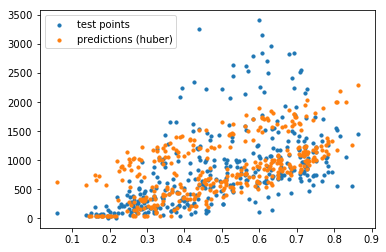

In [13]:
# (A) Fit and evaluate a linear regression model
lr_sgd = SGDRegressor(
    loss='squared_loss', # Cost function
    penalty='none', # Add a penalty term?
    max_iter=1000, # Number of iterations
    random_state=0, # The implementation shuffles the data
    tol=1e-3 # Tolerance for improvement (stop SGD once loss is below)
)
# Fit the linear regression model
lr_sgd.fit(X_tr, y_tr)
y_pred_lr = np.maximum(
    lr_sgd.predict(X_te), # Predictions for test data
    50 # Set a lower limit
)
mae_lr = MAE(y_te, y_pred_lr)
print('MAE linear regression: {:.3f}'.format(mae_lr))

# (B) Same with Huber loss
# Create the estimator
huber = HuberRegressor(epsilon=1.35)

# Fit it to X,y
huber.fit(X_tr, y_tr)
y_pred_huber = np.maximum(
    huber.predict(X_te), # Predictions for test data
    50 # set a lower limit
)
mae_huber = MAE(y_te, y_pred_huber)
print('MAE Huber: {:.3f}'.format(mae_huber))
# (C) Plot best model
plt.scatter(X_te[:,0],y_te,s=10, label='test points')
plt.scatter(X_te[:,0], y_pred_huber, s=10, label='predictions (huber)')
plt.legend()
plt.show()

Exercise - Separate sources and fit two linear regressions
---

We saw in the course that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source and see whether this improves performance.

> **Exercise**: Create a model for each source and evaluate the overall performance on the test set using MAE. Compare your models to a baseline using a bar chart.

In [ ]:
# Separate data points from the two sources
...

# Create a model for each one
...

# Evaluate the overall performance using MAE
...

In [ ]:
# Compare your models to a baseline using a bar chart
...

Exercise - R^2 coefficient
---

> **Exercise**: Compute the $R^{2}$ coefficient of your different models on the test set.

In [ ]:
...